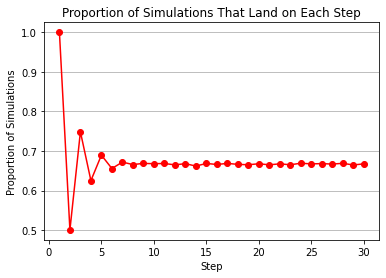


Proportion of simulations that landed on step 25: 0.66750


In [45]:
import random
import matplotlib.pyplot as plt

def simulate_step():
    return random.choice([1, 2])

def run_simulation(n, num_simulations):
    landing_counts = {i: 0 for i in range(1, n + 1)}

    for i in range(num_simulations):
        current_step = 1
        visited_steps = set()
        while current_step <= n:
            if current_step <= n:
                visited_steps.add(current_step)
            step_size = simulate_step()
            current_step += step_size
        for step in visited_steps:
            landing_counts[step] += 1
    landing_proportions = {step: count/num_simulations for step, count in landing_counts.items()}
    return landing_proportions

def plot_results(landing_proportions, n):
    steps = list(landing_proportions.keys())
    proportions = list(landing_proportions.values())
    plt.plot(steps, proportions, marker='o', linestyle='-', color='r')
    plt.title(f"Proportion of Simulations That Land on Each Step")
    plt.xlabel("Step")
    plt.ylabel("Proportion of Simulations")
    plt.grid(axis='y')
    plt.show()

n = 30
num_simulations = 100000

results = run_simulation(n, num_simulations)
plot_results(results, n)
proportion_25 = results.get(25, 0)
print(f"\nProportion of simulations that landed on step 25: {proportion_25:.5f}")

In [46]:
def solve_second_order_markov(n):
    P = {}
    for s_prev in range(n):
        P[(s_prev, n)] = 1
    for s_curr in range(n + 1, 2 * n + 1):
        for s_prev in range(n):
            P[(s_prev, s_curr)] = 0

    for s_curr in range(n - 1, 0, -1):
        for s_prev in range(s_curr):
            P[(s_prev, s_curr)] = 0.5 * P.get((s_curr, s_curr + 1), 0) + 0.5 * P.get((s_curr, s_curr + 2), 0)
    return P.get((0, 1), 0)

n = 25
print(f"Probability of reaching step {n}: {solve_second_order_markov(n):.15f}")

Probability of reaching step 25: 0.666666686534882


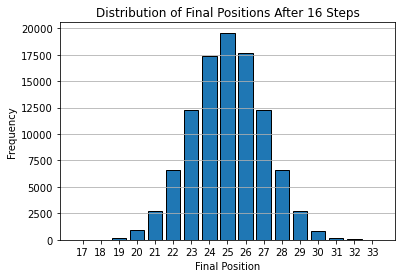

In [48]:
import random
import matplotlib.pyplot as plt

def simulate_random_walk(n):
    position = 1
    for i in range(n):
        step = random.choice([1, 2])
        position += step
    return position

def run_simulations(x, n):
    final_positions = []
    for i in range(x):
        final_position = simulate_random_walk(n)
        final_positions.append(final_position)
    return final_positions

def plot_results(final_positions, n):
    position_counts = {}
    for position in final_positions:
        position_counts[position] = position_counts.get(position, 0) + 1
    positions = sorted(position_counts.keys())
    frequencies = [position_counts[pos] for pos in positions]
    plt.bar(positions, frequencies, edgecolor='black')
    plt.title(f"Distribution of Final Positions After {n} Steps")
    plt.xlabel("Final Position")
    plt.ylabel("Frequency")
    plt.xticks(positions)
    plt.grid(axis='y')
    plt.show()

x = 100000
n = 16

final_positions = run_simulations(x, n)
plot_results(final_positions, n)
